# KPP Fisher Equation

The [Fisher-KPP equation](https://en.wikipedia.org/wiki/KPP%E2%80%93Fisher_equation) is a reaction-diffusion equation that can be used to model population growth and wave propagation. It is given by:

$$
\frac{\partial \phi}{\partial t} = \nu \nabla^2 \phi + r \phi (1 - \phi)
$$

## Solution in 1D

In [ ]:
from torchfsm.operator import Operator, Laplacian, ImplicitSource

def KPPFisher(nu:float,r:float) -> Operator:
    return nu*Laplacian()+r*ImplicitSource(lambda phi:phi*(1-phi))

In [ ]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.traj_recorder import AutoRecorder, IntervalController
from torchfsm.plot import plot_traj
from torchfsm.field import truncated_fourier_series
device='cuda' if torch.cuda.is_available() else 'cpu'
L=10.0; N=100; 

In [ ]:
kpp_fisher = KPPFisher(nu=0.1, r=0.01)

mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=1.0,
    zero_centered=False,
).clamp(0.0,1.0)
traj=kpp_fisher.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

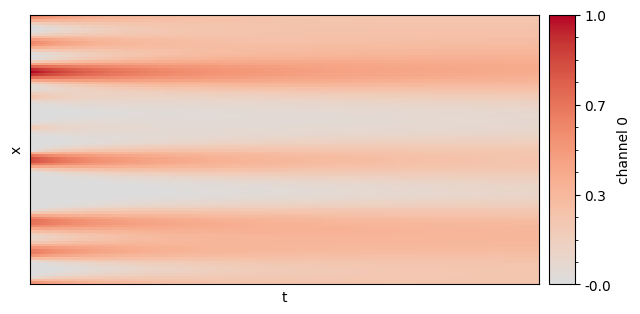

In [61]:
plot_traj(traj,animation=False)

## Solution in 2D

In [ ]:
kpp_fisher = KPPFisher(nu=0.01, r=10.0)

mesh=MeshGrid([(0,L,N)]*2,device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=0.5,
    zero_centered=False,
).clamp(0.0,1.0)
traj=kpp_fisher.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [68]:
plot_traj(traj,animation=True)

## Solution in 3D

In [ ]:
kpp_fisher = KPPFisher(nu=0.01, r=10.0)

mesh=MeshGrid([(0,L,N)]*3,device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=0.2,
    zero_centered=False,
).clamp(0.0,1.0)
traj=kpp_fisher.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [80]:
plot_traj(traj,animation=True)